# Long Short Term Memory

## Importing libraries

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Preparing the data

In [24]:
data = pd.read_csv('../../Data/tesla_stock_data.csv')
data['Date'] = pd.to_datetime(data['Date'])
data.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,2010-06-29,19.000000,25.00,17.540001,23.889999,18766300,23.889999
1,2010-06-30,25.790001,30.42,23.299999,23.830000,17187100,23.830000
2,2010-07-01,25.000000,25.92,20.270000,21.959999,8218800,21.959999
3,2010-07-02,23.000000,23.10,18.709999,19.200001,5139800,19.200001
4,2010-07-06,20.000000,20.00,15.830000,16.110001,6866900,16.110001


#### Interpolating missing dates

In [25]:
data = data.set_index('Date').resample('D').ffill().reset_index()
data.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,2010-06-29,19.000000,25.00,17.540001,23.889999,18766300,23.889999
1,2010-06-30,25.790001,30.42,23.299999,23.830000,17187100,23.830000
2,2010-07-01,25.000000,25.92,20.270000,21.959999,8218800,21.959999
3,2010-07-02,23.000000,23.10,18.709999,19.200001,5139800,19.200001
4,2010-07-03,23.000000,23.10,18.709999,19.200001,5139800,19.200001


#### Checking for missing values

In [26]:
data.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Volume       0
Adj Close    0
dtype: int64

#### Features of the dataset

In [27]:
data.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Adj Close'], dtype='object')

In [28]:
data = data.drop('Adj Close', axis = 1)  # It is the exact same as the Close feature

#### Plotting the closing values of the stock

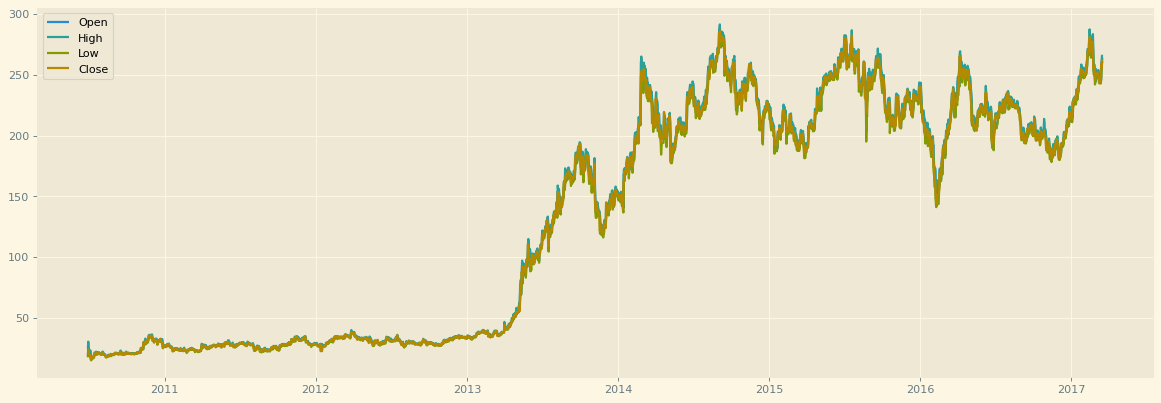

In [29]:
plt.style.use('Solarize_Light2')

plt.figure(figsize=(18, 6), dpi=80)
for feature in data.columns:   
    if feature in ['Date','Volume']: continue
    plt.plot(data['Date'].values, data[feature].values, label = feature)

plt.legend()
plt.show()

#### Creating a column for next day's closing price

In [30]:
data_original = data
data['Next_Close'] = data['Close'].shift(-1)
data = data.iloc[:-1,:].reset_index(drop=True)
data

,Date,Open,High,Low,Close,Volume,Next_Close
0,2010-06-29,19.000000,25.000000,17.540001,23.889999,18766300,23.830000
1,2010-06-30,25.790001,30.420000,23.299999,23.830000,17187100,21.959999
2,2010-07-01,25.000000,25.920000,20.270000,21.959999,8218800,19.200001
3,2010-07-02,23.000000,23.100000,18.709999,19.200001,5139800,19.200001
4,2010-07-03,23.000000,23.100000,18.709999,19.200001,5139800,19.200001
...,...,...,...,...,...,...,...
2448,2017-03-12,246.210007,246.500000,243.000000,243.690002,3057000,246.169998
2449,2017-03-13,244.820007,246.850006,242.779999,246.169998,3010700,258.000000
2450,2017-03-14,246.110001,258.119995,246.020004,258.000000,7575500,255.729996
2451,2017-03-15,257.000000,261.000000,254.270004,255.729996,4816600,262.049988


In [31]:
length_data = len(data)
split_ratio = 0.7

length_train = round(length_data * split_ratio)  
length_test = length_data - length_train

print("Data length :", length_data)
print("Train data length :", length_train)
print("Validation data lenth :", length_test)

Data length : 2453
Train data length : 1717
Validation data lenth : 736


In [32]:
features = ['Open', 'Low', 'High', 'Close', 'Volume']
label = 'Next_Close'
for feature in features:
    data[feature] = (data[feature]-data[feature].min())/(data[feature].max() - data[feature].min())

data[label] = (data[label]-data[label].min())/(data[label].max() - data[label].min())

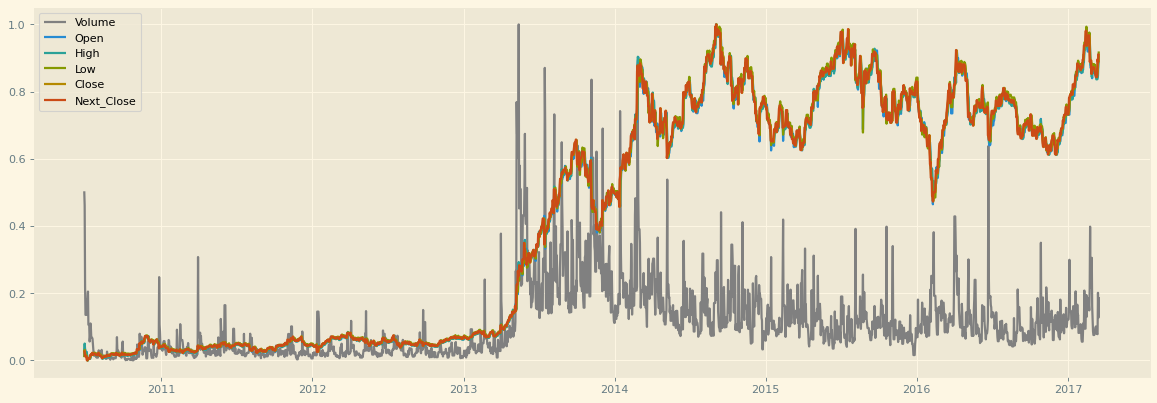

In [33]:

plt.style.use('Solarize_Light2')
plt.figure(figsize=(18, 6), dpi=80)
plt.plot(data['Date'].values, data['Volume'].values, label = 'Volume', color = 'gray')
for feature in data.columns:   
    if feature in ['Date','Volume']: continue
    plt.plot(data['Date'].values, data[feature].values, label = feature)

plt.legend()
plt.show()

In [34]:
X_train = data[:length_train][features]
X_train.head()

,Open,Low,High,Close,Volume
0,0.010533,0.009645,0.030460,0.029936,0.503377
1,0.035539,0.031347,0.050184,0.029714,0.460748
2,0.032630,0.019931,0.033808,0.022795,0.218659
3,0.025264,0.014053,0.023545,0.012581,0.135544
4,0.025264,0.014053,0.023545,0.012581,0.135544


In [35]:
X_test = data[length_train:][features]
X_test.head()

,Open,Low,High,Close,Volume
1717,0.654108,0.658466,0.647112,0.648572,0.108807
1718,0.636431,0.649311,0.637287,0.639728,0.143494
1719,0.636431,0.649311,0.637287,0.639728,0.143494
1720,0.636431,0.649311,0.637287,0.639728,0.143494
1721,0.647663,0.658654,0.652425,0.665705,0.148745


In [36]:
y_train_full = data[:length_train][label].values
y_test_full = data[length_train:][label].values

y_test_full.shape

(736,)

In [37]:
X_train_lstm = []
y_train_lstm = []

time_interval = 25

for i in range(time_interval, length_train):
    X_train_lstm.append(X_train.iloc[i-time_interval:i,:])
    y_train_lstm.append(y_train_full[i])
    
X_train_lstm, y_train_lstm = np.array(X_train_lstm), np.array(y_train_lstm)
y_train_lstm = y_train_lstm.reshape(-1,1)

In [38]:
X_test_lstm = []
y_test_lstm = []

time_interval = 25

for i in range(time_interval, length_test):
    X_test_lstm.append(X_test.iloc[i-time_interval:i,:])
    y_test_lstm.append(y_test_full[i])
    
X_test_lstm, y_test_lstm = np.array(X_test_lstm), np.array(y_test_lstm)
y_test_lstm = y_test_lstm.reshape(-1,1)

In [39]:
print(X_train_lstm.shape)
print(y_train_lstm.shape)
print(X_test_lstm.shape)
print(y_test_lstm.shape)

(1692, 25, 5)
(1692, 1)
(711, 25, 5)
(711, 1)


In [40]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout, Input
from keras.optimizers import Adam

model = Sequential()

model.add(Input(shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])))

model.add(LSTM(units=20, return_sequences=False))  
model.add(Dropout(0.2))

model.add(Dense(units=1))  # Predicting a single value (tomorrow's closing price)

model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

model.summary()

history = model.fit(X_train_lstm, y_train_lstm, epochs=50, batch_size=128, validation_data=(X_test_lstm, y_test_lstm), verbose=1)

test_loss = model.evaluate(X_test_lstm, y_test_lstm)
print(f'Test Loss: {test_loss}')

# model.save('tesla_stock_lstm_model.h5')


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 20)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 20)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            21 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,101 (8.21 KB)

 Trainable params: 2,101 (8.21 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0101 - val_loss: 0.0028
Epoch 2/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0055 - val_loss: 0.0017
Epoch 3/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0053 - val_loss: 0.0017
Epoch 4/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0043 - val_loss: 0.0027
Epoch 5/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0042 - val_loss: 0.0014
Epoch 6/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0041 - val_loss: 0.0015
Epoch 7/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0039 - val_loss: 0.0013
Epoch 8/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0036 - val_loss: 0.0022
Epoch 9/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0035 - val_loss: 0.0026
Epoch 10/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0033 - val_loss: 0.0017
Epoch 11/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0031 - val_loss: 0.0022
Epoch 12/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0031 - val_l

53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


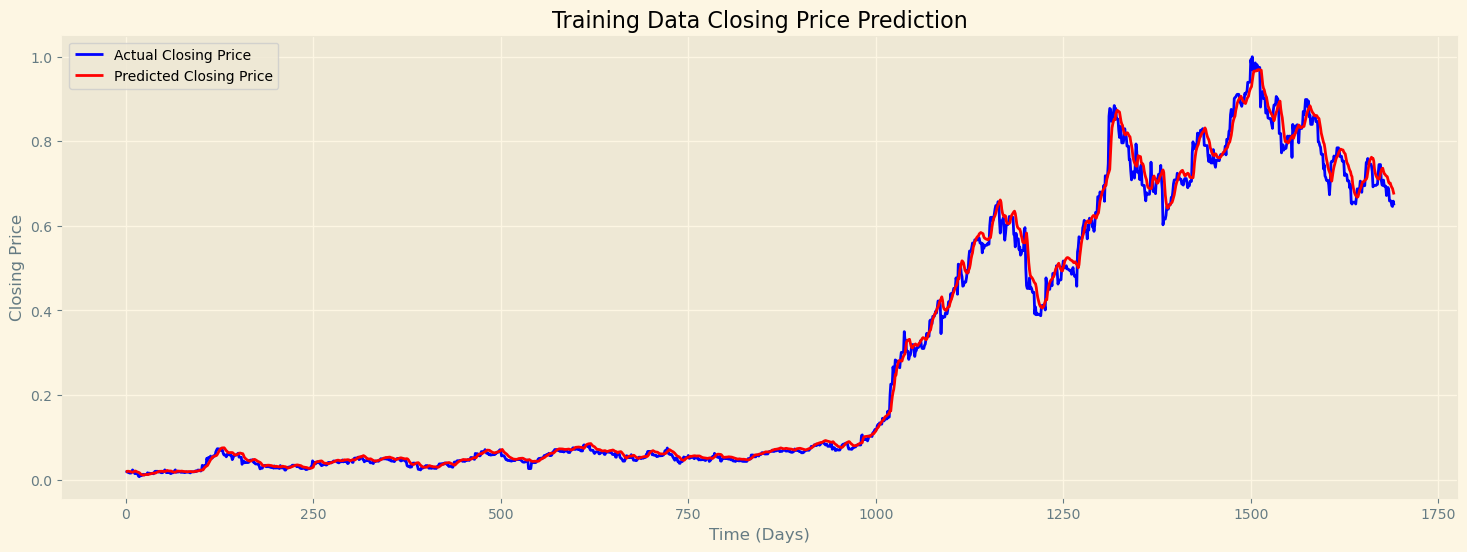

In [41]:
y_pred = model.predict(X_train_lstm)
plt.figure(figsize=(18, 6))

plt.plot(y_train_lstm, color='blue', label='Actual Closing Price')

plt.plot(y_pred, color='red', label='Predicted Closing Price')

plt.title('Training Data Closing Price Prediction')
plt.xlabel('Time (Days)')
plt.ylabel('Closing Price')
plt.legend()

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


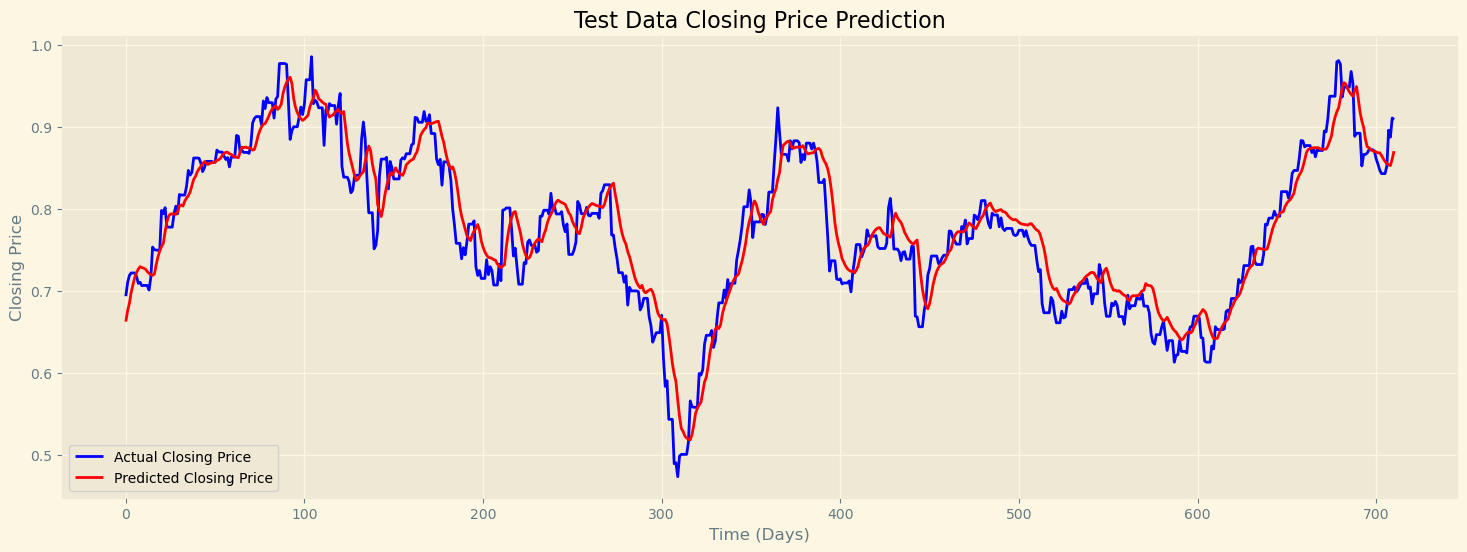

In [42]:
y_pred = model.predict(X_test_lstm)

plt.figure(figsize=(18, 6))

plt.plot(y_test_lstm, color='blue', label='Actual Closing Price')

plt.plot(y_pred, color='red', label='Predicted Closing Price')

plt.title('Test Data Closing Price Prediction')
plt.xlabel('Time (Days)')
plt.ylabel('Closing Price')
plt.legend()